# Kernel Ridge Regression

Let's first simulate a 2D nonlinear functions as follow. The goal of this task is to predict the true function by observing few samples from it.


In [57]:
import numpy as np

def create2Dsurface(x,y):
    z = x*np.exp(-x**2-y**2) 
    return z


### Create Training Data
To do this, we will create our training dataset and visulaize the as follow:




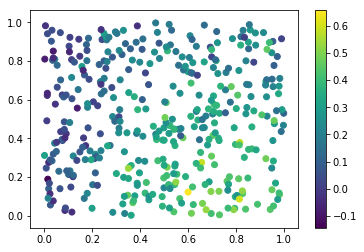

In [58]:
import matplotlib.pyplot as plt

n = 400
x = np.random.rand(n)
y = np.random.rand(n)
Ztrue = create2Dsurface(x,y)
y_train = Ztrue+np.random.randn(n)*0.1
X_train = np.concatenate((x.flatten()[:,np.newaxis],y.flatten()[:,np.newaxis]),axis=1)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.colorbar()
plt.show()

### Create Testing Data
We will create our Testing dataset based on the 2D meshgrid and visulaize the image of this 2D surface

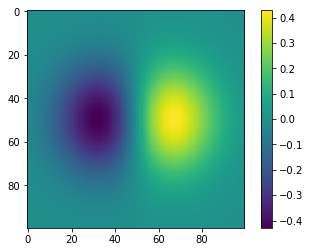

In [60]:
ntest=100
ti = np.linspace(-2.0, 2.0, ntest)
x1test, x2test = np.meshgrid(ti, ti)

X_test = np.concatenate((x1test.flatten()[:,np.newaxis],x2test.flatten()[:,np.newaxis]),axis=1)
y_test = create2Dsurface(x1test,x2test).flatten()
plt.imshow(y_test.reshape((ntest,ntest)))
plt.colorbar()
plt.show()

In [61]:
X_test.shape

(10000, 2)

## Let's try the Linear Regression on the dataset
Please implement linear regression from [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to fit y_train (z) from X_train (x and y).
Please use the testing data X_test and y_test and 
 1. Visualize the final fitting result (For the visualization, please follow the testing plot for y_test)
 2. Compute the mean-square error for the linear regression for the testing samples.



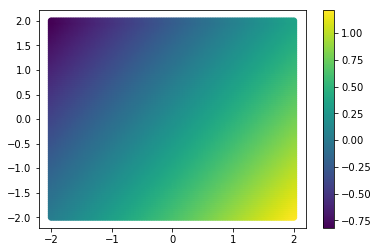

In [62]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

clf = LinearRegression()
clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.colorbar()
plt.show()

In [78]:
print("Training error for training data:",mean_squared_error(y_train, y_pred_train))
print("Testing error for testing data:",mean_squared_error(y_test, y_pred))

Training error for training data: 0.00689745121972
Testing error for testing data: 0.188755878117


In [79]:
print("Training accuracy for training data:",clf.score(X_train, y_train))
print("Testing accuracy for testing data:",clf.score(X_test, y_test))

Training accuracy for training data: 0.484352147603
Testing accuracy for testing data: -6.85478563932


## Let's try the Kernel Ridge Regression on the dataset
Please implement Kernel Ridge regression from [sklearn](http://scikit-learn.org/stable/modules/kernel_ridge.html) to fit y_train (z) from X_train (x and y).
Please use the testind data X_test and y_test and 
 1. Use tuning parameter selection to select the best kernel bandwidth and regularization constance
 1. Visualize the final fitting result
 2. Compute the mean-square error for the kernel ridge regression for the testing samples.



In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=10,
                  param_grid={"alpha": np.logspace(-10,1,10),
                              "gamma": np.logspace(-2, 2, 5)})
kr.fit(X_train, y_train) 
print('Best parameters:{}'.format(kr.best_params_))

Best parameters:{'alpha': 0.59948425031894215, 'gamma': 1.0}


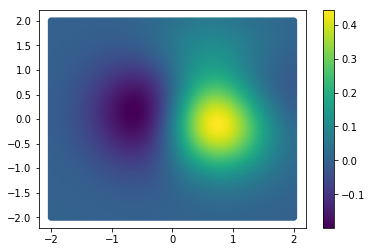

In [66]:
yhat = kr.predict(X_test)
y_pred_train = kr.predict(X_train)
plt.scatter(X_test[:,0],X_test[:,1],c=yhat)
plt.colorbar()
plt.show()

In [67]:
print("Training error for training data:",mean_squared_error(y_train, y_pred_train))
print("Testing error for testing data:",mean_squared_error(y_test, yhat))

Training error for training data: 0.00868642416946
Testing error for testing data: 0.00446204153561


In [68]:
print("Training accuracy for training data:",kr.score(X_train, y_train))
print("Testing accuracy for testing data:",kr.score(X_test, y_test))

Training accuracy for training data: 0.616500972014
Testing accuracy for testing data: 0.814319002271


## (Bonus) Let's try the Random Forest Regression on the dataset 
Please implement Random Forest Regression from [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to fit y_train (z) from X_train (x and y). We have not talked about Random Forest Regression, but it is very similar to random forest classifier. 

Please use the testind data X_test and y_test 
 1. Use tuning parameter selection to select the best tree depth and n_estimator
 1. Visualize the final fitting result
 2. Compute the mean-square error for the kernel ridge regression for the testing samples.



In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [70]:
regr = RandomForestRegressor()
param_grid = {
    'max_depth':[2,4,8,16,32,64],
    'n_estimators': [4,8,16,32]}

grid_clf = GridSearchCV(regr, param_grid, return_train_score=True,cv=10,n_jobs=-1)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 4, 8, 16, 32, 64], 'n_estimators': [4, 8, 16, 32]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [71]:
print('Best parameters:{}'.format(grid_clf.best_params_,))

Best parameters:{'max_depth': 4, 'n_estimators': 32}


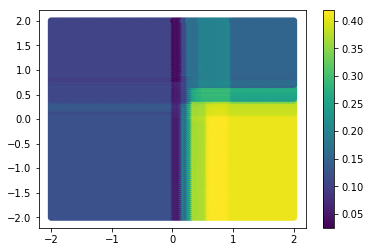

In [72]:
yhat = grid_clf.predict(X_test)
y_pred_train = grid_clf.predict(X_train)
plt.scatter(X_test[:,0],X_test[:,1],c=yhat)
plt.colorbar()
plt.show()

In [73]:
print("Training error for training data:",mean_squared_error(y_train, y_pred_train))
print("Testing error for testing data:",mean_squared_error(y_test, yhat))

Training error for training data: 0.00689745121972
Testing error for testing data: 0.0567093123934


In [74]:
print("Training accuracy for training data:",grid_clf.score(X_train, y_train))
print("Testing accuracy for testing data:",grid_clf.score(X_test, y_test))

Training accuracy for training data: 0.695482768658
Testing accuracy for testing data: -1.35987083976
